In [0]:
# install mlflow to track the ML tunning experienments information
%pip install --upgrade mlflow==1.18.0

Python interpreter will be restarted.
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=b26e968c0146e209c5b7ea1d24944f7b3b7396556b17a16b22770b1c67069c53
  Stored in directory: /root/.cache/pip/wheels/9d/de/6d/ca8d461ec29e010b1267d7353d0b058819770f7680bb9360e4
  Created wheel for databricks-cli: filename=databricks_cli-0.16.6-py3-none-any.whl size=112628 sha256=32b0020fc2d7e007345b93f70da6ac639621408758936c6d6623d07a1a61d37e
  Stored in directory: /root/.cache/pip/wheels/76/3a/2f/8a3d92bc72a413217b5c8649e2044d7161cacbe06e014361a3
Successfully built alembic databricks-cli
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-3e602e8f-4b57-4f94-8cc8-e480eaa719fa
    Can't uninstall 'Jinja2'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
#MLflow packages importing
import mlflow
import mlflow.spark
from mlflow.tracking import MlflowClient

In [0]:
#Data processing
import datetime
import numpy as np

# Preprocessing packages
import pyspark.sql.functions as F 
from pyspark.sql.functions import *
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,MinMaxScaler
from pyspark.ml import Pipeline

#Model training 
from pyspark.ml.regression import LinearRegression,DecisionTreeRegressor
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml.evaluation import RegressionEvaluator,MulticlassClassificationEvaluator

In [0]:
try:
<<<<<<< local
    import mlflow.pyspark.ml
    mlflow.pyspark.ml.autolog()
except:
    print(f"Your version of MLflow ({mlflow.__version__}) does not support pyspark.ml for autologging. To use autologging, upgrade your MLflow client version or use Databricks Runtime for ML 8.3 or above.")
=======
  import mlflow.pyspark.ml
  mlflow.pyspark.ml.autolog()
except:
  print(f"Your version of MLflow ({mlflow.__version__}) does not support pyspark.ml for autologging. To use autologging, upgrade your MLflow client version or use Databricks Runtime for ML 8.3 or above.")
>>>>>>> remote

2022/04/24 19:40:47 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of pyspark.ml. If you encounter errors during autologging, try upgrading / downgrading pyspark.ml to a supported version, or try upgrading MLflow.


In [0]:
# File location and type
file_location = "/FileStore/tables/Load_from_db.csv"
file_type = "csv"

spark_df=spark.read.csv(file_location,header=True,inferSchema =True)

**Data cleaning**

In [0]:
# Convert the pandas df to spark df for data processing
type(spark_df)

# Check the features and datatype in the dataframe
spark_df.printSchema()

# Check missing value
<<<<<<< local
missing_value=spark_df.select([count(when(isnan(c), c)).alias(c) for (c,c_type) in spark_df.dtypes 
                               if c_type not in ('timestamp', 'date')])
=======
missing_value=spark_df.select([count(when(isnan(c), c)).alias(c) for (c,c_type) in spark_df.dtypes if c_type not in ('timestamp', 'date')])
>>>>>>> remote

# indentify the columns with na
na_columns = [ column for column in missing_value.columns if missing_value.agg(F.sum(column)).collect()[0][0]>0 ]

# show columns with na and the number of na 
missing_value.select(na_columns).show()

# Calculate the percentage of na in a column
<<<<<<< local
pct_na=spark_df.select([(count(when(isnan(c), c))/count(lit(1))).alias(c) for (c,c_type) in spark_df.dtypes 
                        if c_type not in ('timestamp', 'date')])
=======
pct_na=spark_df.select([(count(when(isnan(c), c))/count(lit(1))).alias(c) for (c,c_type) in spark_df.dtypes if c_type not in ('timestamp', 'date')])
>>>>>>> remote

# show columns with na and the percentage of na 
pct_na.select(na_columns).show()

# Drop the columns with more than a half of na
spark_df=spark_df.drop("chase_wins","chase_stage_wins")

def mean(df,column):
    return df.select(sum(F.nanvl(F.col(column), F.lit(0)))).collect()[0][0]/len(df.select(column).collect())

# get the mean value of the columns which needs to replace na
replace_na_list=['chase_bonus']
mean_value=[]
for i in replace_na_list:
    mean_value.append(mean(spark_df,i))

# Fill na with mean value
spark_df=spark_df.na.fill({replace_na_list[0]: mean_value[0]})


root
 |-- _c0: integer (nullable = true)
 |-- full_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthday: timestamp (nullable = true)
 |-- country: string (nullable = true)
 |-- series: string (nullable = true)
 |-- rookie_year: integer (nullable = true)
 |-- rank: integer (nullable = true)
 |-- poles: integer (nullable = true)
 |-- top_5: integer (nullable = true)
 |-- top_20: integer (nullable = true)
 |-- chase_bonus: double (nullable = true)
 |-- chase_wins: double (nullable = true)
 |-- chase_stage_wins: double (nullable = true)
 |-- avg_start_position: double (nullable = true)
 |-- avg_finish_position: double (nullable = true)
 |-- avg_laps_completed: double (nullable = true)
 |-- laps_led_pct: double (nullable = true)
 |-- dnf: integer (nullable = true)
 |-- season: integer (nullable = true)

++
||
++
||
++

++
||
++
||
++



**Feature Engineering**

In [0]:
# Get the age of the driver
spark_df=spark_df.withColumn('birth_year',year("birthday"))
spark_df=spark_df.withColumn('age',2022-spark_df['birth_year'])

# Get the experience in nascar races of the drivers
spark_df=spark_df.withColumn('experience',2022-spark_df['rookie_year'])

# Drop the columns after transformation
spark_df=spark_df.drop("birth_year","rookie_year","birthday")

# DNF ratio (DNF to top 20 score ratio)
spark_df=spark_df.withColumn('DNF_ratio',spark_df['dnf']/spark_df['top_20'])

spark_df=spark_df.na.fill({'DNF_ratio':0})

# Drop the columns after transformation
spark_df=spark_df.drop("dnf","top_20")

In [0]:
# Transform Dependent variable into 4 classes
spark_df = spark_df.withColumn('rank_class',
    F.when(F.col("rank").between(0, 10), 1)\
    .when(F.col('rank').between(11,30), 2)\
    .when(F.col('rank').between(31,50), 3)\
    .otherwise(4)
)

spark_df=spark_df.drop("rank")

**Data exploration**

In [0]:
#Summary statistics
spark_df.select(['rank_class','poles','top_5','chase_bonus','avg_start_position','avg_finish_position',
                 'avg_laps_completed','laps_led_pct','age','experience','DNF_ratio']).describe().show(5,False)


+-------+-----------------+-------------------+------------------+-----------------+------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+
|summary|rank_class       |poles              |top_5             |chase_bonus      |avg_start_position|avg_finish_position|avg_laps_completed|laps_led_pct     |age               |experience       |DNF_ratio         |
+-------+-----------------+-------------------+------------------+-----------------+------------------+-------------------+------------------+-----------------+------------------+-----------------+------------------+
|count  |2161             |2161               |2161              |2161             |2161              |2161               |2161              |2161             |2161              |2161             |2161              |
|mean   |3.001388246182323|0.22674687644608976|1.5386395187413235|2.437991991727491|22.432497732531278|21.602098611753814 |155.09121

In [0]:
# check for correlation
non_string_col=['rank_class','poles','top_5','chase_bonus','avg_start_position','avg_finish_position',
                'avg_laps_completed','laps_led_pct','age','experience','DNF_ratio']

for x in non_string_col:
    for y in non_string_col:
        if x!=y:
            if spark_df.select(corr(x,y)).collect()[0][0]>=0.7:
                spark_df.select(corr(x,y)).show()


+------------------------+
|corr(top_5, chase_bonus)|
+------------------------+
|      0.7557743963893704|
+------------------------+

+------------------------+
|corr(chase_bonus, top_5)|
+------------------------+
|      0.7557743963893704|
+------------------------+

+---------------------------------------------+
|corr(avg_start_position, avg_finish_position)|
+---------------------------------------------+
|                           0.7757336297355889|
+---------------------------------------------+

+---------------------------------------------+
|corr(avg_finish_position, avg_start_position)|
+---------------------------------------------+
|                           0.7757336297355887|
+---------------------------------------------+

+---------------------+
|corr(age, experience)|
+---------------------+
|   0.7368649873866028|
+---------------------+

+---------------------+
|corr(experience, age)|
+---------------------+
|   0.7368649873866028|
+---------------------+



**Preparing Data for Machine Learning**

In [0]:
# Specify independent deatures needed for ml
feature_cols=['series', 'gender', 'country','poles','top_5','chase_bonus','avg_start_position','avg_finish_position',
                'avg_laps_completed','laps_led_pct','age','experience','DNF_ratio']
#Specify the categorical columns
categoricalColumns = ['series', 'gender', 'country']
#Specify the numerical columns
numericCols = ['top_5','chase_bonus','avg_start_position','avg_finish_position','avg_laps_completed',
               'laps_led_pct','age','experience','DNF_ratio']

#Category Indexing and One-Hot Encoding
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]


In [0]:
# Iterating over columns to be scaled
for i in numericCols:
    # VectorAssembler Transformation - Converting column to vector type
    assemble_num = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")
    stages += [assemble_num,scaler]

#Merges multiple columns into a vector column
assemblerInputs = [c + "classVec" for c in categoricalColumns] +  [n + "_Scaled" for n in numericCols]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]


**Using pipeline to fit and transform**

In [0]:
# Chain multiple Transformers and Estimators together to specify ml workflow
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(spark_df)
spark_df = pipelineModel.transform(spark_df)
spark_df.printSchema()

model_df=spark_df.select('features','rank_class')

print((model_df.count(), len(model_df.columns)))


2022/04/24 19:41:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '145e02fad93544baa35b4891c8db60f7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2022/04/24 19:41:40 WARNING mlflow.utils: Truncated the value of the key `stages`. Truncated value: `['StringIndexer_1', 'OneHotEncoder_1', 'StringIndexer_2', 'OneHotEncoder_2', 'StringIndexer_3', 'OneHotEncoder_3', 'VectorAssembler_1', 'MinMaxScaler_1', 'VectorAssembler_2', 'MinMaxScaler_2', 'VectorAssembler_3', 'MinMaxScaler_3', 'VectorAssemble...`
2022/04/24 19:41:40 WARNING mlflow.utils: Truncated the value of the key `VectorAssembler_10.inputCols`. Truncated value: `['seriesclassVec', 'genderclassVec', 'countryclassVec', 'top_5_Scaled', 'chase_bonus_Scaled', 'avg_start_position_Scaled', 'avg_finish_position_Scaled', 'avg_laps_completed_Scaled', 'laps_led_pct_Scaled', 'age_Scaled', 'experience_Scaled', 'DNF_ra...`
root
 |-

**Train test split**

In [0]:
#split the data for train test purpose
train_df,test_df=model_df.randomSplit([0.75,0.25],seed=14)

print((train_df.count(), len(train_df.columns)))
print((test_df.count(), len(test_df.columns)))

(1593, 2)
(568, 2)


**Linear regression**

In [0]:
def lr_train(elasticNetParam,loss,solver):
    
    with mlflow.start_run(run_name='Linear_Regression') as run:
    
        #Fit the data
<<<<<<< local
        lr=LinearRegression(featuresCol='features', labelCol='rank_class',elasticNetParam=elasticNetParam,
                            loss=loss,solver=solver)
=======
        lr=LinearRegression(featuresCol='features', labelCol='rank_class',elasticNetParam=elasticNetParam,loss=loss,solver=solver)
>>>>>>> remote
        model_lr=lr.fit(train_df)
    
        #Log parameters
        mlflow.log_param("elasticNetParam",elasticNetParam)
        mlflow.log_param("loss",loss)
        mlflow.log_param("solver",solver)


        # Log the model for this run
        mlflow.spark.log_model(model_lr,"PySpark-ML-Linear-Regression")

        #Predict
        prediction_lr=model_lr.transform(test_df)

        #Save the prediction
        prediction_lr.toPandas().to_csv("model_lr_predictions.csv",index=False)

        #Log the saved prediction as aerifact
        mlflow.log_artifact("model_lr_predictions.csv")

        #Evaluate the model
        regressionEvaluator = RegressionEvaluator(predictionCol="prediction",labelCol="rank_class")
        rmse=regressionEvaluator.setMetricName("rmse").evaluate(prediction_lr)
        r2=regressionEvaluator.setMetricName("r2").evaluate(prediction_lr)
        mse=regressionEvaluator.setMetricName("mse").evaluate(prediction_lr)
        mae=regressionEvaluator.setMetricName("mae").evaluate(prediction_lr)

        #Log metrics
        mlflow.log_metric("rmse",rmse)
        mlflow.log_metric("r2",r2)
        mlflow.log_metric("mse",mse)
        mlflow.log_metric("mae",mae)
        
        return model_lr, rmse,r2,mse, mae

In [0]:
model_name, rmse,r2,mse, mae = lr_train(0.8,'squaredError','auto')
<<<<<<< local
print(f"The {model_name} achieved an rmse score of {rmse}, r2 score of {r2}, mse score of {mse},mae score of {mae} on the validation data")
=======
print(f"The {model_name} achieved an rmse score of {rmse}, r2 score of {r2}, mse score of {mse}, mae score of {mae} on the validation data")
>>>>>>> remote

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)
The LinearRegressionModel: uid=LinearRegression_8d5c0d738a75, numFeatures=26 achieved an rmse score of 0.8216650920617675, r2 score of 0.39490655311078426, mse score of 0.6751335235128729, mae score of 0.6795199616688908 on the validation data


**Decision Tree Regressor**

In [0]:
def dtr_train(maxDepth,minInstancesPerNode,maxBins,impurity):
    
    with mlflow.start_run(run_name='DecisionTree_Regressor') as run:
        
        #Fit the data
        dtr = DecisionTreeRegressor(featuresCol='features', labelCol='rank_class',maxDepth=maxDepth,minInstancesPerNode=minInstancesPerNode,
                                         maxBins=maxBins,impurity=impurity)
        model_dtr=dtr.fit(train_df)

        #Log parameters
        mlflow.log_param("maxDepth",maxDepth)
        mlflow.log_param("minInstancesPerNode",minInstancesPerNode)
        mlflow.log_param("maxBins",maxBins)
        mlflow.log_param("impurity",impurity)


        # Log the model for this run
        mlflow.spark.log_model(model_dtr,"PySpark-ML-DecisionTree-Regressor")

        #Predict
        prediction_dtr=model_dtr.transform(test_df)

        #Save the prediction
        prediction_dtr.toPandas().to_csv("model_dtr_predictions.csv",index=False)

        #Log the saved prediction as aerifact
        mlflow.log_artifact("model_dtr_predictions.csv")

        #Evaluate the model
        regressionEvaluator = RegressionEvaluator(predictionCol="prediction",labelCol="rank_class")
        rmse=regressionEvaluator.setMetricName("rmse").evaluate(prediction_dtr)
        r2=regressionEvaluator.setMetricName("r2").evaluate(prediction_dtr)
        mse=regressionEvaluator.setMetricName("mse").evaluate(prediction_dtr)
        mae=regressionEvaluator.setMetricName("mae").evaluate(prediction_dtr)

        #Log metrics
        mlflow.log_metric("rmse",rmse)
        mlflow.log_metric("r2",r2)
        mlflow.log_metric("mse",mse)
        mlflow.log_metric("mae",mae)
        
        return model_dtr, rmse,r2,mse, mae

In [0]:
model_name, rmse,r2,mse, mae = dtr_train(8,200,5,'variance')
print(f"The {model_name} achieved an rmse score of {rmse}, r2 score of {r2}, mse score of {mse}, mae score of {mae} on the validation data")

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)
The DecisionTreeRegressionModel: uid=DecisionTreeRegressor_87924e463fc5, depth=3, numNodes=11, numFeatures=26 achieved an rmse score of 0.7290347107836236, r2 score of 0.5236466879496078, mse score of 0.5314916095273617, mae score of 0.5636123173885488 on the validation data


**Decsion Tree Classfier**

In [0]:
def dtc_train(maxDepth,minInstancesPerNode,maxBins):
    
    with mlflow.start_run(run_name='DecisionTree_Classifier') as run:
        
        #Fit the data
        dtc = DecisionTreeClassifier(featuresCol='features', labelCol='rank_class',maxDepth=maxDepth,minInstancesPerNode=minInstancesPerNode,
                                         maxBins=maxBins)
        model_dtc=dtc.fit(train_df)

        #Log parameters
        mlflow.log_param("maxDepth",maxDepth)
        mlflow.log_param("minInstancesPerNode",minInstancesPerNode)
        mlflow.log_param("maxBins",maxBins)


        # Log the model for this run
        mlflow.spark.log_model(model_dtc,"PySpark-ML-DecisionTree-Classifier")

        #Predict
        prediction_dtc=model_dtc.transform(test_df)

        #Save the prediction
        prediction_dtc.toPandas().to_csv("model_dtc_predictions.csv",index=False)

        #Log the saved prediction as aerifact
        mlflow.log_artifact("model_dtc_predictions.csv")

        #Evaluate the model
        evaluator = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol="rank_class")
        accuracy=evaluator.setMetricName("accuracy").evaluate(prediction_dtc)
        f1=evaluator.setMetricName("f1").evaluate(prediction_dtc)
        recall=evaluator.setMetricName("weightedRecall").evaluate(prediction_dtc)
        precision=evaluator.setMetricName("weightedPrecision").evaluate(prediction_dtc)

        #Log metrics
        mlflow.log_metric("accuracy",accuracy)
        mlflow.log_metric("f1",f1)
        mlflow.log_metric("recall",recall)
        mlflow.log_metric("precision",precision)
        
        return model_dtc, accuracy,f1,recall, precision

In [0]:
model_name, accuracy,f1,recall,precision = dtc_train(8,200,6)
print(f"The {model_name} achieved an accuracy score of {accuracy}, F1 score of {f1}, recall score of {recall}, precision score of {precision} on the validation data")

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)
The DecisionTreeClassificationModel: uid=DecisionTreeClassifier_135327f4403c, depth=3, numNodes=7, numClasses=5, numFeatures=26 achieved an accuracy score of 0.6302816901408451, F1 score of 0.6115179873246217, recall score of 0.6302816901408451, precision score of 0.6094380971141535 on the validation data


**Random Forest Classfier**

In [0]:
def rfc_train(numTrees,maxDepth,maxBins):
    
    with mlflow.start_run(nested=True,run_name='RandomForest_Classifier') as run:

        #Fit the data
        rfc = RandomForestClassifier(featuresCol='features', labelCol='rank_class',maxDepth=maxDepth,numTrees=numTrees,
                                         maxBins=maxBins)
        model_rfc=rfc.fit(train_df)

        #Log parameters
        mlflow.log_param("maxDepth",maxDepth)
        mlflow.log_param("numTrees",numTrees)
        mlflow.log_param("maxBins",maxBins)


        # Log the model for this run
        mlflow.spark.log_model(model_rfc,"PySpark-ML-RandomForest_Classifier")

        #Predict
        prediction_rfc=model_rfc.transform(test_df)

        #Save the prediction
        prediction_rfc.toPandas().to_csv("model_rfc_predictions.csv",index=False)

        #Log the saved prediction as aerifact
        mlflow.log_artifact("model_rfc_predictions.csv")

        #Evaluate the model
        evaluator = MulticlassClassificationEvaluator(predictionCol="prediction",labelCol="rank_class")
        accuracy=evaluator.setMetricName("accuracy").evaluate(prediction_rfc)
        f1=evaluator.setMetricName("f1").evaluate(prediction_rfc)
        recall=evaluator.setMetricName("weightedRecall").evaluate(prediction_rfc)
        precision=evaluator.setMetricName("weightedPrecision").evaluate(prediction_rfc)

        #Log metrics
        mlflow.log_metric("accuracy",accuracy)
        mlflow.log_metric("f1",f1)
        mlflow.log_metric("recall",recall)
        mlflow.log_metric("precision",precision)
        
        return model_rfc, accuracy,f1,recall, precision

In [0]:
model_name, accuracy,f1,recall,precision = rfc_train(200,8,4)
print(f"The {model_name} achieved an accuracy score of {accuracy}, F1 score of {f1}, recall score of {recall}, precision score of {precision} on the validation data")

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)
The RandomForestClassificationModel: uid=RandomForestClassifier_e704c20f4758, numTrees=200, numClasses=5, numFeatures=26 achieved an accuracy score of 0.6672535211267606, F1 score of 0.6303183243537531, recall score of 0.6672535211267606, precision score of 0.6443239189040714 on the validation data


**Hyperparameter Tuning**

In [0]:
! pip install hyperopt
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

     |████████████████████████████████| 1.6 MB 6.3 MB/s 
     |████████████████████████████████| 199 kB 55.6 MB/s 
     |████████████████████████████████| 78 kB 11.4 MB/s 
     |████████████████████████████████| 2.0 MB 41.7 MB/s 
     |████████████████████████████████| 829 kB 48.2 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=5dd104e71d9ebb96a34af9bc12ddb3111b8521dbc19a259f64fba43bf7e5459b
  Stored in directory: /root/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-3e602e8f-4b57-4f94-8cc8-e480eaa719fa/bin/python -m pip install --upgrade pip' command.


In [0]:
def train_with_hyperopt(params):
    numTrees = int(params['numTrees'])
    maxDepth = int(params['maxDepth'])
    maxBins = int(params['maxBins'])
    model_name, accuracy,f1,recall,precision = rfc_train(numTrees,maxDepth,maxBins)
    loss = - accuracy
    return {'loss': loss, 'status': STATUS_OK}

import numpy as np
space = {
  'numTrees': hp.uniform('numTrees', 50, 500),
  'maxBins': hp.uniform('maxBins', 2, 32),
  'maxDepth': hp.uniform('maxDepth', 2, 20)
}
algo=tpe.suggest

In [0]:
with mlflow.start_run():
    best_params = fmin(
    fn=train_with_hyperopt,
    space=space,
    algo=algo,
    max_evals=8)
    
    best_numTrees = int(best_params['numTrees'])
    best_maxDepth = int(best_params['maxDepth'])
    best_maxBins = int(best_params['maxBins'])
    
    #Log parameters
    mlflow.log_param("maxDepth",best_maxDepth)
    mlflow.log_param("numTrees",best_numTrees)
    mlflow.log_param("maxBins",best_maxBins)
    
    
    final_model, accuracy, f1, recall, precision = rfc_train(best_numTrees, best_maxDepth,best_maxBins)
    
    #Log metrics
    mlflow.log_metric("accuracy",accuracy)
    mlflow.log_metric("f1",f1)
    mlflow.log_metric("recall",recall)
    mlflow.log_metric("precision",precision)
 

  0%|          | 0/8 [00:00<?, ?trial/s, best loss=?]/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)

 12%|█▎        | 1/8 [00:43<05:02, 43.26s/trial, best loss: -0.6619718309859155]/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consid

In [0]:
print(f"On the test data, the tuned model {final_model} achieved an accuracy score of {accuracy}, F1 score of {f1}, recall score of {recall}, precision score of {precision} on the validation data")

On the test data, the tuned model RandomForestClassificationModel: uid=RandomForestClassifier_d5699867a5f2, numTrees=333, numClasses=5, numFeatures=26 achieved an accuracy score of 0.6971830985915493, F1 score of 0.6826669645038748, recall score of 0.6971830985915493, precision score of 0.6808699504274337 on the validation data


**Get Model experiments information Using pyspark**

In [0]:
# List MLflow experiments
MlflowClient().list_experiments()

Out[86]: [<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/2458750063903873', experiment_id='2458750063903873', lifecycle_stage='active', name='/Users/zihui.liang.21@ucl.ac.uk/2022-04-24 - Preprocessing and ML', tags={'mlflow.experiment.sourceName': '/Users/zihui.liang.21@ucl.ac.uk/2022-04-24 - '
                                  'Preprocessing and ML',
  'mlflow.experimentType': 'NOTEBOOK',
  'mlflow.ownerEmail': 'zihui.liang.21@ucl.ac.uk',
  'mlflow.ownerId': '4470132393684221'}>]

In [0]:
# Get all runs for a given experiment
experiment_id = run.info.experiment_id
runs_df = mlflow.search_runs(experiment_id)

# Display information
runs_df.T

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
run_id,74baa9f4849c4a33986deab2e4eb9365,b5c48e044e0f487a98c344359525e578,a378094871f3424ead5015cd115ba3f4,ed5a849c820041d292ad8af623d16075,25520b64995c4473a2db6f201073be93,62fff5be4e1748bc9b8d97b8db56fcea,8991303fbb8f4eb6b564d8068470083d,31cce2c0d2e04a3789c44dfe4b223026,a82eb9679fdb4825ad4982884be99ae4,3fe8dd3c6a9442e883d1207f10d50792,...,02d947fea1404344b54d08ec16e712b3,1847246d87294a5e9ee3e71ae2a046bc,58c3a75723d44e74bd84e25da197c59b,5eac1e60b93c49ae9f6d82feb3e1a30a,1220a020867b4a658e2b02ccb87f21ce,a45fd5d7260743d0ac5e3580b2c39a26,c16cf94490144c8086d088d32cc605ce,50113be2bb9746a59d76a6a1ad5a4724,f532bb946f6e4425b3f4376cb5bfe468,d85fa13fda344294b79b7b4673c8bfa1
experiment_id,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,...,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873,2458750063903873
status,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,...,FAILED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED,FINISHED
artifact_uri,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...,dbfs:/databricks/mlflow-tracking/2458750063903...
start_time,2022-04-25 01:35:50.284000+00:00,2022-04-25 01:32:20.772000+00:00,2022-04-25 01:31:42.782000+00:00,2022-04-25 01:30:32.615000+00:00,2022-04-25 01:27:37.742000+00:00,2022-04-25 01:25:53.609000+00:00,2022-04-25 01:21:10.832000+00:00,2022-04-25 01:18:59.255000+00:00,2022-04-25 01:18:16+00:00,2022-04-25 01:18:15.571000+00:00,...,2022-04-25 00:07:01.213000+00:00,2022-04-24 23:09:43.308000+00:00,2022-04-24 23:04:55.005000+00:00,2022-04-24 23:03:51.607000+00:00,2022-04-24 23:02:04.634000+00:00,2022-04-24 22:15:43.258000+00:00,2022-04-24 22:06:36.723000+00:00,2022-04-24 21:11:17.024000+00:00,2022-04-24 21:07:43.763000+00:00,2022-04-24 20:10:25.297000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tags.mlflow.databricks.cluster.info,"{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....",...,"{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"",""spark_version"":""10....","{""cluster_name"":""Pyspark"

In [0]:
# Get the latest tun
runs = MlflowClient().search_runs(experiment_id,order_by=['attributes.start_time desc'],max_results=1)

# Get the metrics from the latest run
runs[0].data.metrics

Out[88]: {'accuracy': 0.6971830985915493,
 'f1': 0.6826669645038748,
 'precision': 0.6808699504274337,
 'recall': 0.6971830985915493}

**Using Databricks UI to retrieve the Run records**

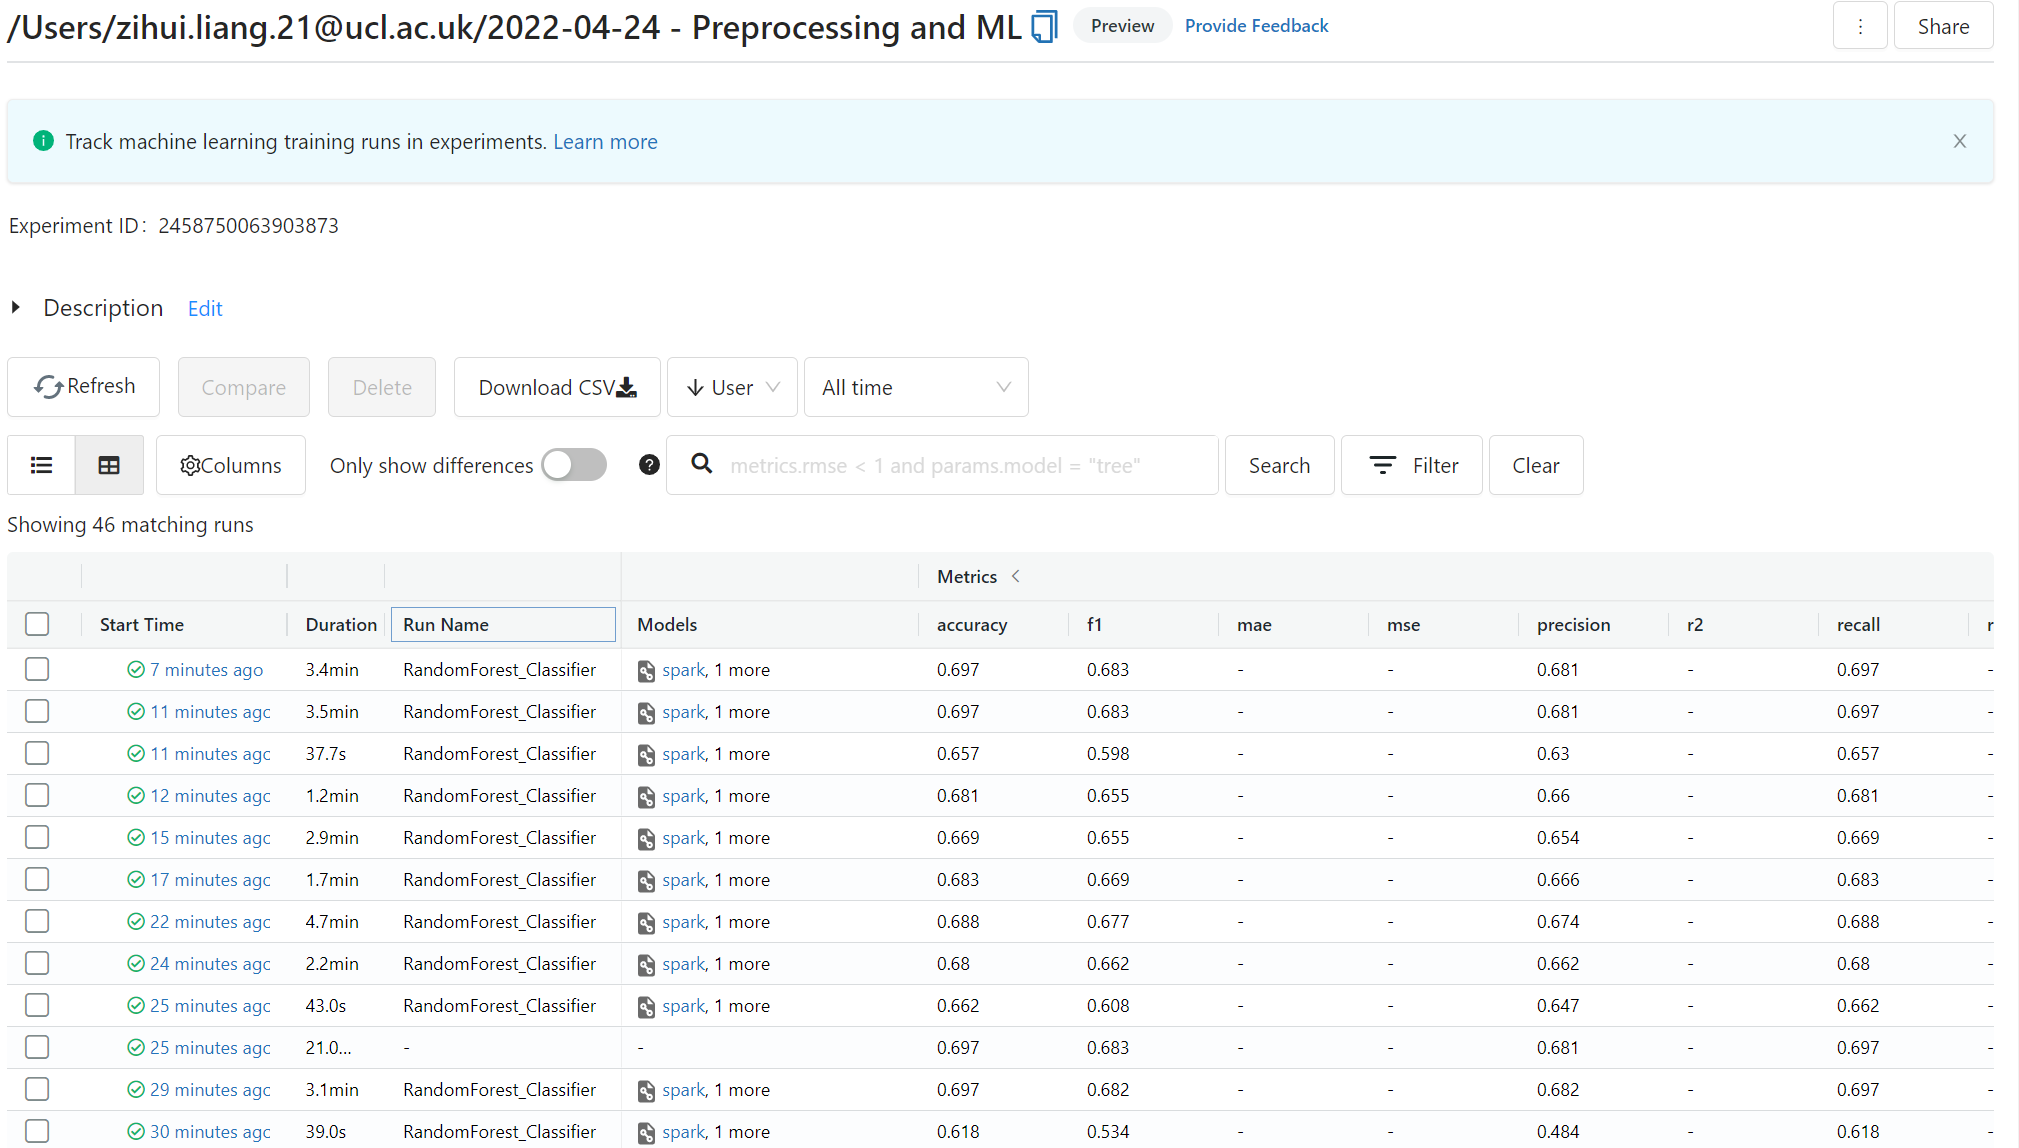

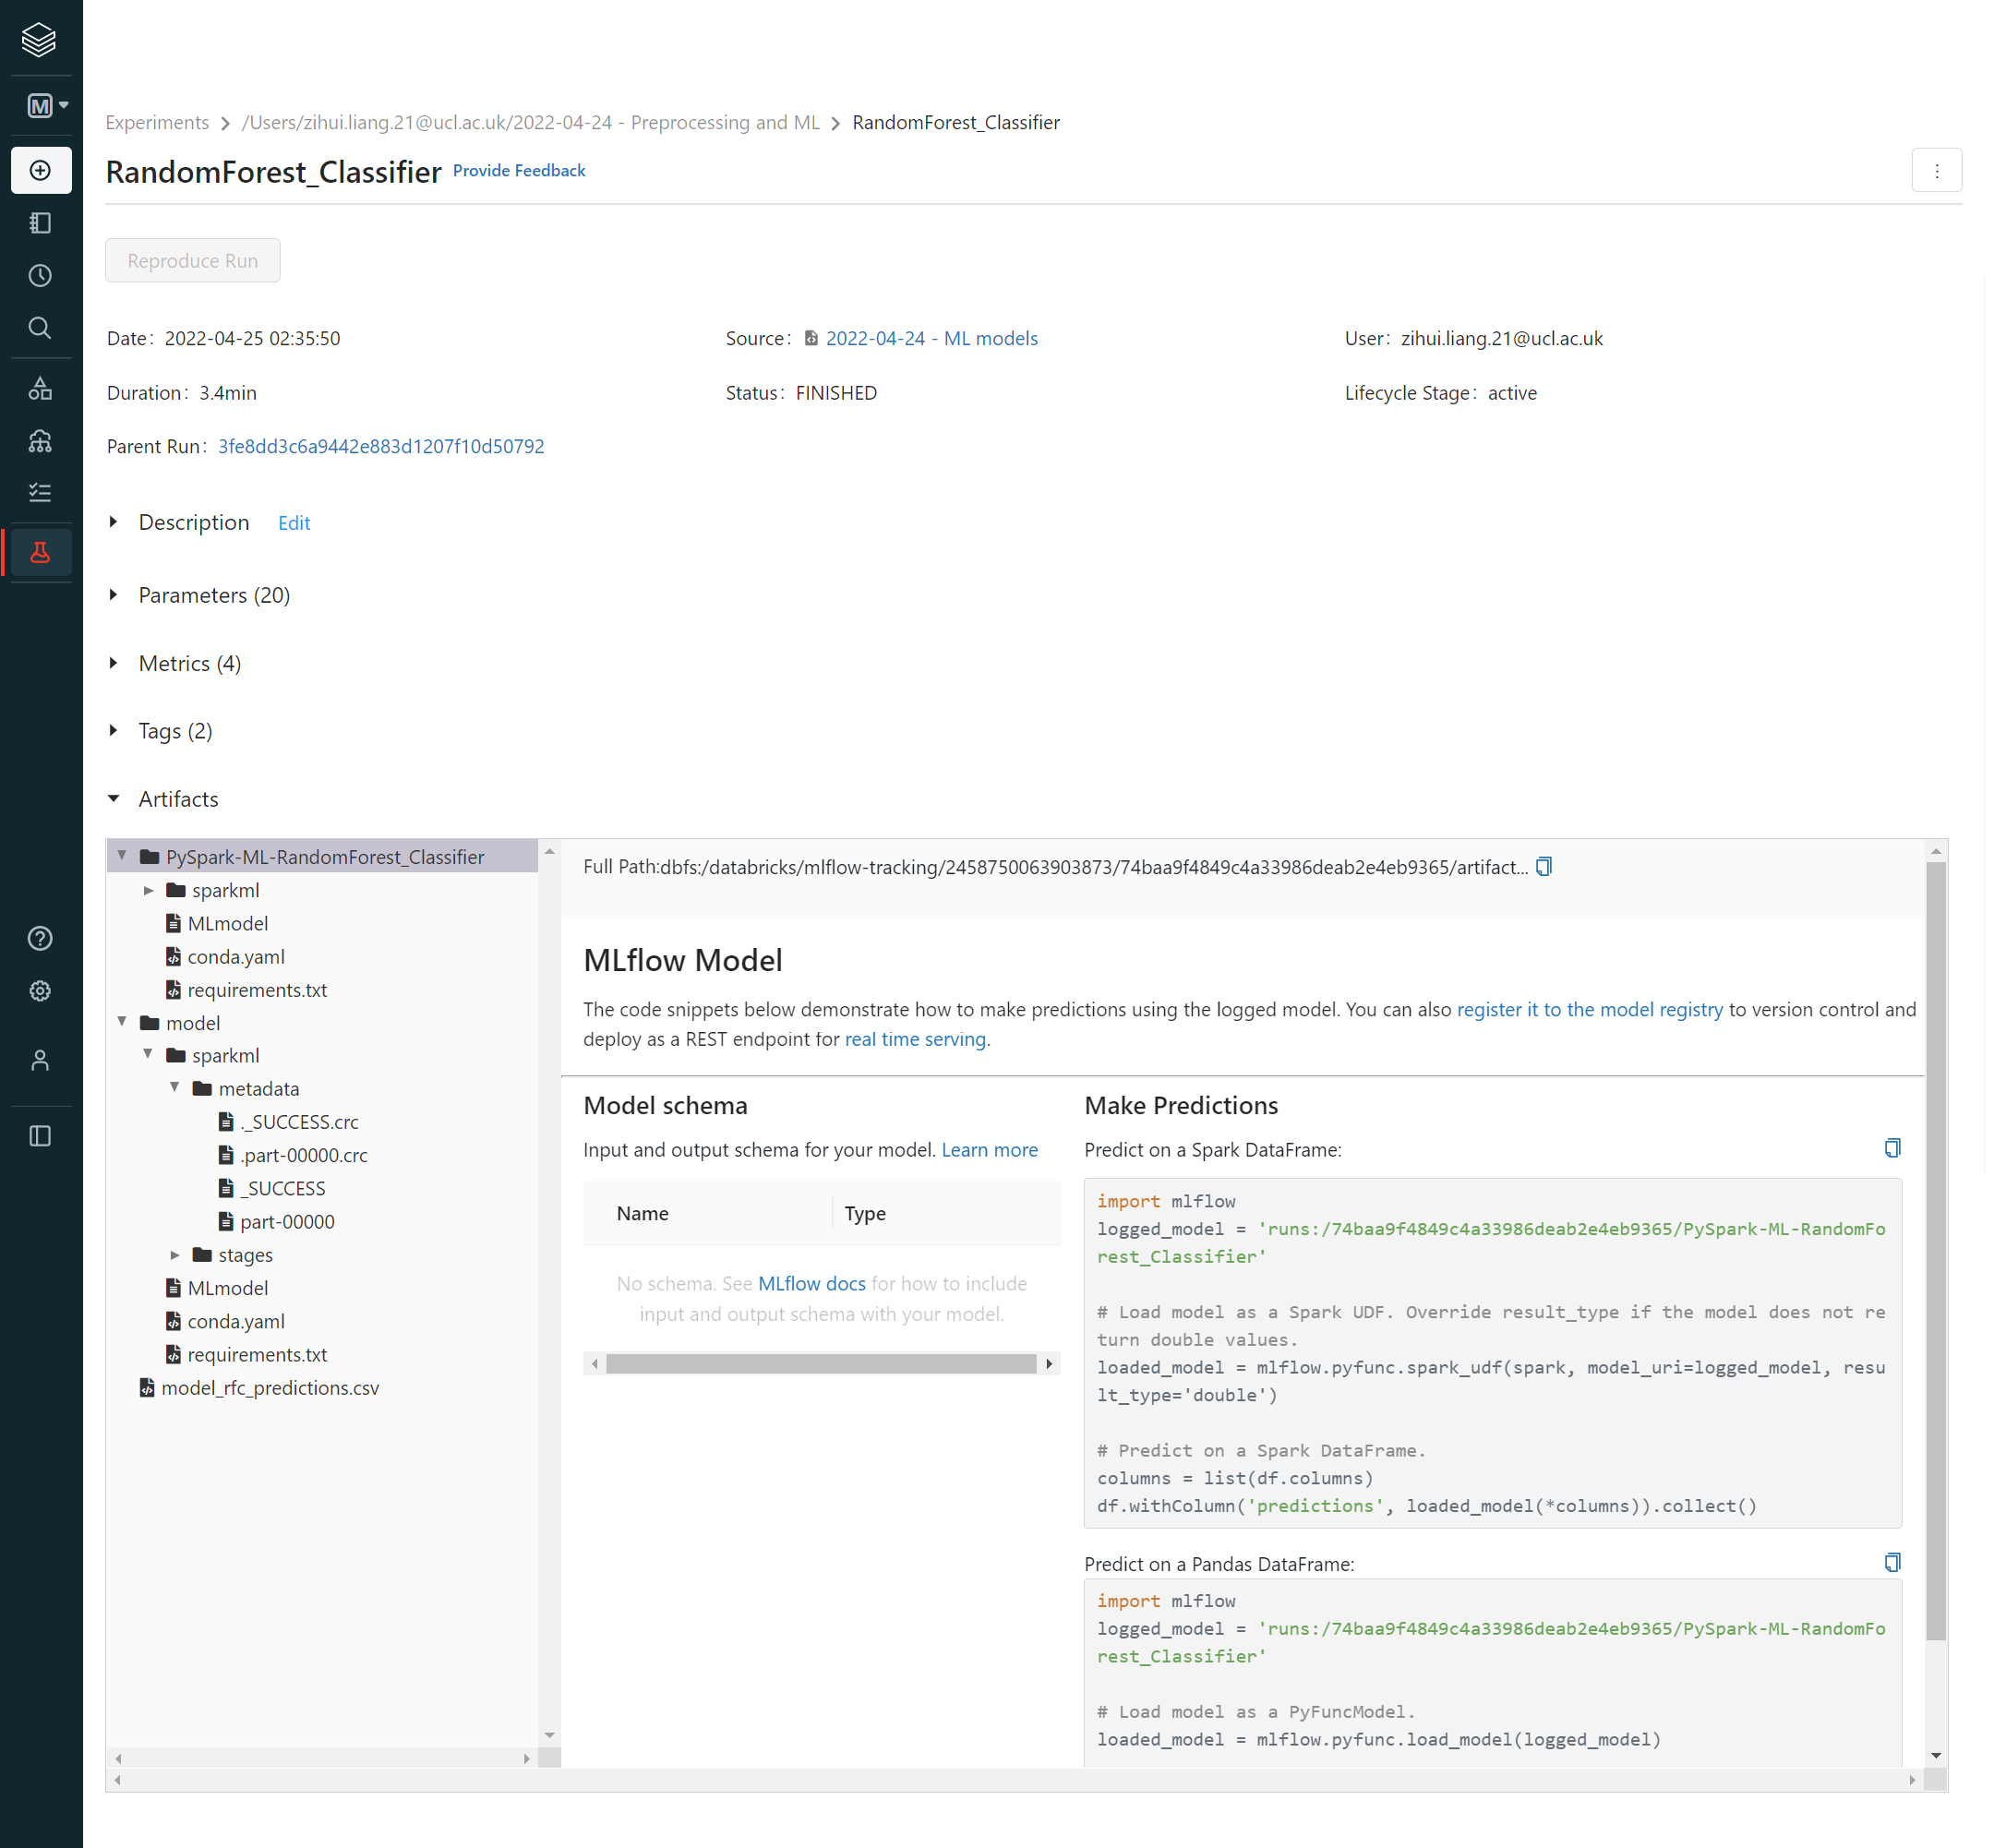